## 1- Cargamos los datos

In [1]:
import pandas as pd

data = pd.read_csv("../datasets/converted_data/customer_dataset.csv", sep=",")

In [2]:
from funpymodeling import status

status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,fraudulent,455,0.730337,107,0.171750,2,object
1,paymentMethodRegistrationFailure,281,0.451043,302,0.484751,2,object
2,paymentMethodType,281,0.451043,0,0.000000,4,object
3,paymentMethodProvider,281,0.451043,0,0.000000,10,object
4,paymentMethodIssuer,281,0.451043,0,0.000000,20,object
5,transactionAmount,0,0.000000,0,0.000000,67,int64
6,transactionFailed,0,0.000000,455,0.730337,2,bool
7,orderAmount,145,0.232745,0,0.000000,67,float64
8,orderState,145,0.232745,0,0.000000,3,object
9,emailDomain,0,0.000000,0,0.000000,6,object


# AED 1

## 1- Análisis univariado

### paymentMethodType

In [3]:
data["paymentMethodType"].unique()

array(['card', 'bitcoin', 'apple pay', 'paypal', nan], dtype=object)

In [4]:
status(data["paymentMethodType"])

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,paymentMethodType,281,0.451043,0,0.0,4,object


In [5]:
from funpymodeling import freq_tbl

freq_tbl(data["paymentMethodType"])

,paymentMethodType,frequency,percentage,cumulative_perc
0,card,242,0.388443,0.707602
1,apple pay,36,0.057785,0.812865
2,paypal,36,0.057785,0.918129
3,bitcoin,28,0.044944,1.000000


In [6]:
freq_tbl(data["paymentMethodType"]).query("frequency<=30")

,paymentMethodType,frequency,percentage,cumulative_perc
3,bitcoin,28,0.044944,1.0


En base a la información anterior, podemos deducir que el método de pago menos utilizado es _bitcoin_ y el más utilizado _card_.

A su vez, podemos encontrar una gran cantidad de nulos en esa categoría, un 45% para ser específicos.

In [7]:
import seaborn as sns

<Axes: xlabel='count', ylabel='paymentMethodType'>

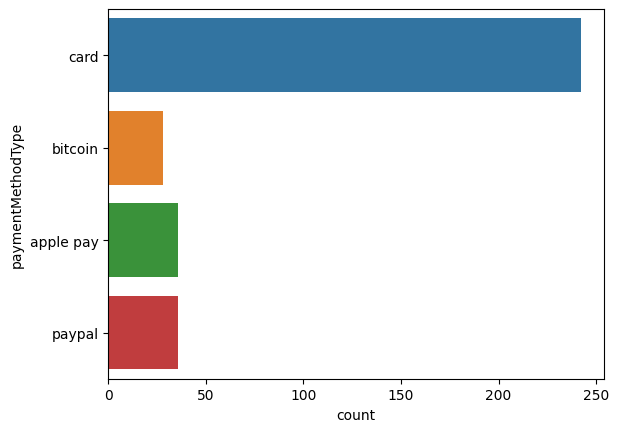

In [8]:
sns.countplot(y = "paymentMethodType",data = data)

Si vemos el gráfico, podemos reiterar que el método de pago más utilizado es la tarjeta, con una amplia diferencia.

### fraudulent

In [9]:
freq_tbl(data["fraudulent"])

,fraudulent,frequency,percentage,cumulative_perc
0,False,107,0.171750,0.636905
1,True,61,0.097913,1.000000


In [10]:
status(data["fraudulent"])

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,fraudulent,455,0.730337,107,0.17175,2,object


<Axes: xlabel='count', ylabel='fraudulent'>

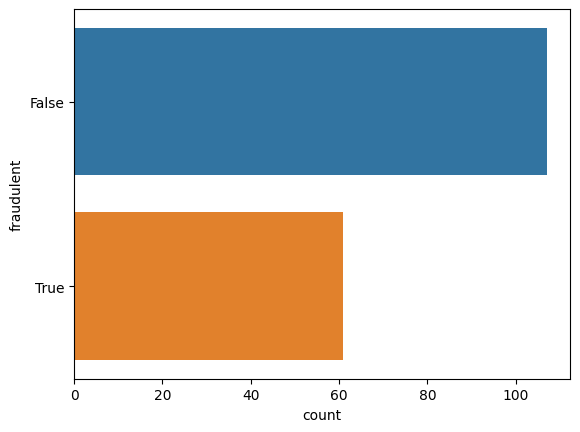

In [11]:
sns.countplot(y="fraudulent",data=data)

Podemos ver que hay casi el doble de casos donde _no_ es fraude, a comparación de cuando _sí_ es fraude y también que hay casi un 70% de nulos.

# AED 2

## 1- Análisis bivariado

### 1.1 - Análisis de categórica vs categórica 

In [12]:
status(data["transactionFailed"])

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,transactionFailed,0,0.0,455,0.730337,2,bool


In [13]:
pd.crosstab(data.fraudulent, data.transactionFailed, normalize=True,margins=True)

transactionFailed,False,True,All
fraudulent,,,
False,0.434524,0.202381,0.636905
True,0.261905,0.101190,0.363095
All,0.696429,0.303571,1.000000


Podemos observar que `transactionFailed` tiene un mayor porcentaje cuando es _False_, tanto para cuando `fraudulent` es _False_ y es _True_, que cuando es _True_. Esto es así porque hay más del doble de valores de _False_ que de _True_ en `transactionFailed`.

### 1.2 - Análisis de numérica vs categórica

In [14]:
data.groupby("fraudulent")["transactionAmount"].mean()

fraudulent
False    33.373832
True     30.950820
Name: transactionAmount, dtype: float64

In [15]:
from funpymodeling import profiling_num

data.groupby("fraudulent")["transactionAmount"].describe()

,count,mean,std,min,25%,50%,75%,max
fraudulent,,,,,,,,
False,107.0,33.373832,16.519584,10.0,20.5,33.0,44.5,75.0
True,61.0,30.950820,14.548111,10.0,19.0,29.0,42.0,69.0


Podemos mencionar que por más que haya más valores _False_ que _True_ para `fraudulent`, el promedio de los valores de `transactionAmount` es similar entre _fraudulent==True_ y _fraudulent==False_. El desvío estándar también es similar entre ambas categorías.  
 
Por lo que podemos decir que no notamos una diferencia notable en `transactionAmount` para ambos valores que puede tener `fraudulent`.

### 1.3 - Análisis de numérica vs numérica

Como queremos ver 2 variables numéricas, tenemos que discretizar una variable o ambas. En este caso, debido a la cantidad de valores que poseía cada una y para una mayor comprensión de los datos, decidí discretizar ambas.

In [16]:
data_orderAmount_discretized = pd.qcut(data["orderAmount"], q = 5)
data_transactionAmount_discretized = pd.qcut(data["transactionAmount"], q = 5)

In [17]:
pd.crosstab(data_orderAmount_discretized, data_transactionAmount_discretized, normalize=True)

transactionAmount,"(9.999, 18.0]","(18.0, 30.0]","(30.0, 38.0]","(38.0, 47.0]","(47.0, 353.0]"
orderAmount,,,,,
"(9.999, 18.4]",0.041841,0.027197,0.041841,0.052301,0.037657
"(18.4, 30.0]",0.037657,0.043933,0.046025,0.025105,0.048117
"(30.0, 39.0]",0.039749,0.035565,0.035565,0.058577,0.035565
"(39.0, 47.0]",0.052301,0.033473,0.023013,0.048117,0.046025
"(47.0, 353.0]",0.050209,0.041841,0.033473,0.037657,0.027197


Ahora vamos a hacer un promedio de todas las variables por `transactionAmount`.

In [18]:
data2 = data.copy()
data2["orderAmount"] = pd.qcut(data2["orderAmount"], q = 5)

columns = data2.drop(["transactionAmount"], axis = 1).columns

for vars in columns:
    print(data2.groupby(vars)["transactionAmount"].mean())
    print("\n")

fraudulent
False    33.373832
True     30.950820
Name: transactionAmount, dtype: float64


paymentMethodRegistrationFailure
False    33.566225
True     39.925000
Name: transactionAmount, dtype: float64


paymentMethodType
apple pay    39.277778
bitcoin      35.250000
card         32.855372
paypal       38.388889
Name: transactionAmount, dtype: float64


paymentMethodProvider
American Express               34.272727
Diners Club / Carte Blanche    32.794118
Discover                       37.120000
JCB 15 digit                   34.600000
JCB 16 digit                   29.338462
Maestro                        33.468750
Mastercard                     36.473684
VISA 13 digit                  35.218750
VISA 16 digit                  33.578947
Voyager                        42.583333
Name: transactionAmount, dtype: float64


paymentMethodIssuer
                            37.000000
B                           43.857143
Bastion Banks               45.724138
Bulwark Trust Corp.         36.55172

Podemos observar que la mayoría de los promedios rondan entre 25 y 40, donde gran parte se acercan a 30.

A su vez, podemos notar que en `paymentMethodIssuer` hay ciertos valores que tienen un promedio más alejado del normal, tales como cuando _paymentMethodIssuer==a_, el promedio es 18 y cuando _paymentMethodIssuer==p_, el promedio es 59.

## 2- Gráficos en AED

### 2.1 - Análisis de numérica vs categórica 

<Axes: xlabel='transactionFailed', ylabel='transactionAmount'>

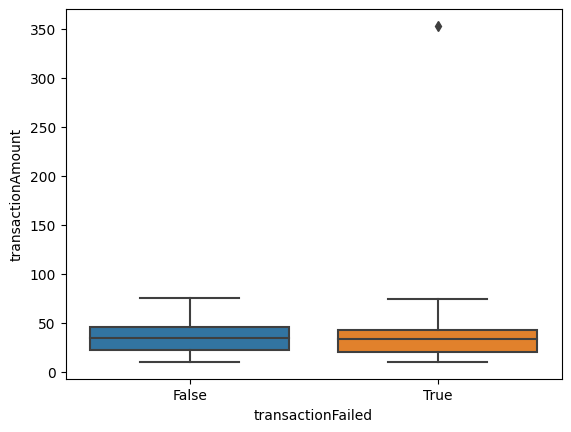

In [19]:
sns.boxplot(y = "transactionAmount", x = "transactionFailed", data = data)

<Axes: xlabel='transactionFailed', ylabel='transactionAmount'>

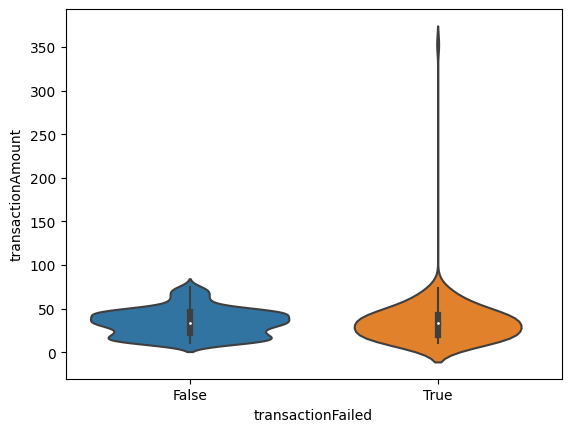

In [20]:
sns.violinplot(y = "transactionAmount", x = "transactionFailed", data = data)

Al observar tanto el _boxplot_ como el _violinplot_, podemos detectar un outlier en la categoría `transactionAmount`, por eso mismo, ahora vamos a reailzar un análisis univariado de la columna `transactionAmount`:

<Axes: >

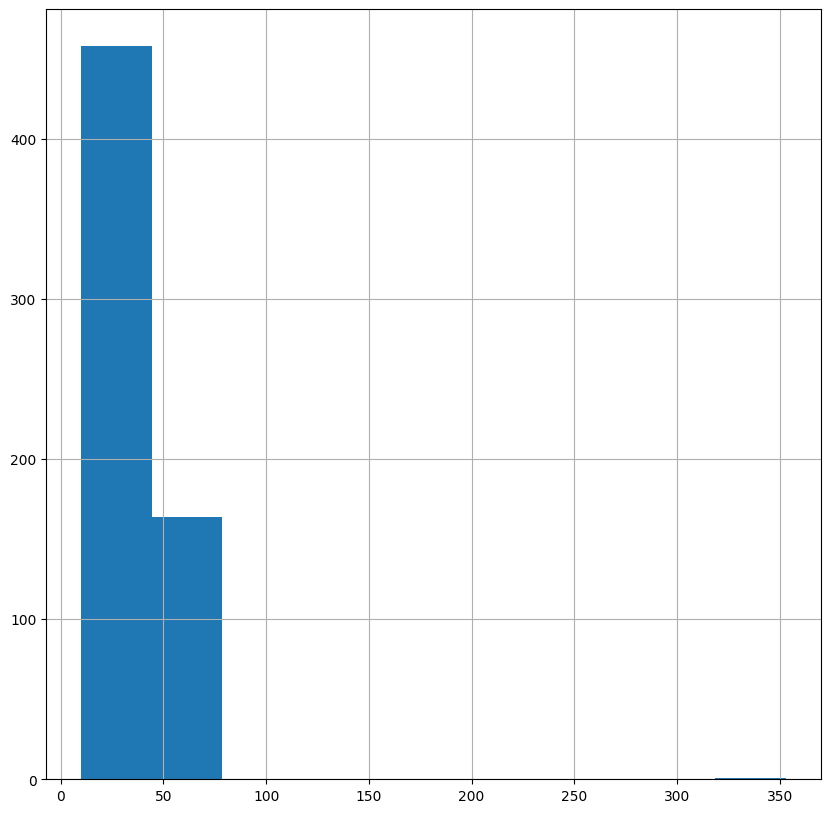

In [21]:
data["transactionAmount"].hist(figsize = (10,10))

In [22]:
import matplotlib.pyplot as plt

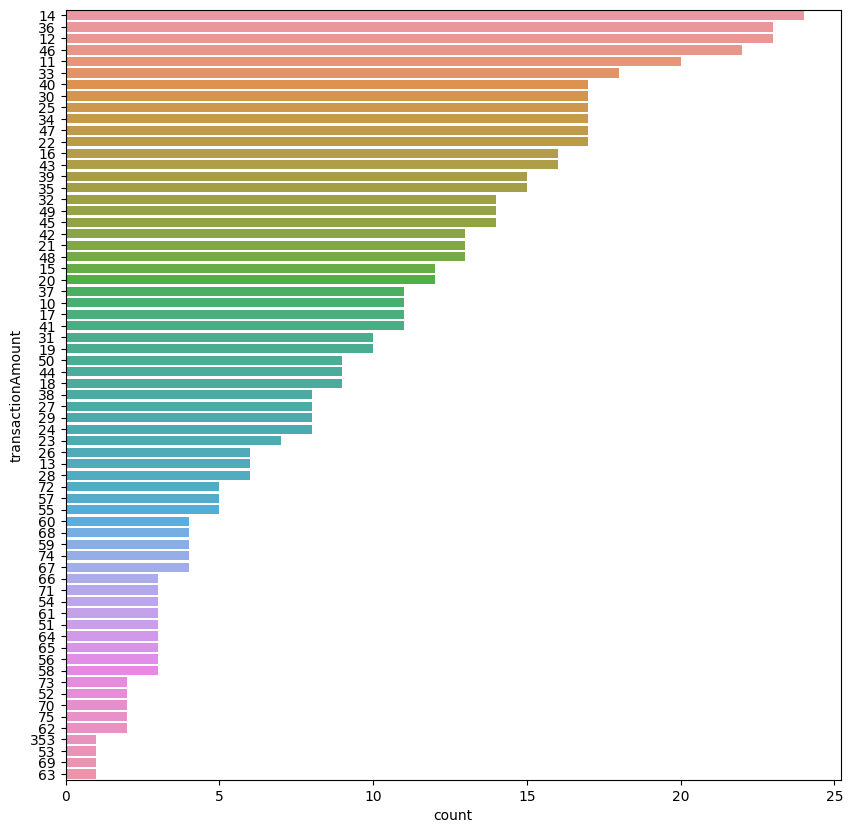

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(y="transactionAmount",data=data, order=data["transactionAmount"].value_counts().index )
plt.show()

Podemos encontrar que la mayoría de valores se encuentran entre 10 y 75, pero si observamos con detalle, podemos encontrar el valor _353_, el cual lo podemos clasificar como __outlier__.

### 2.2 - Análisis de categórica vs categórica 

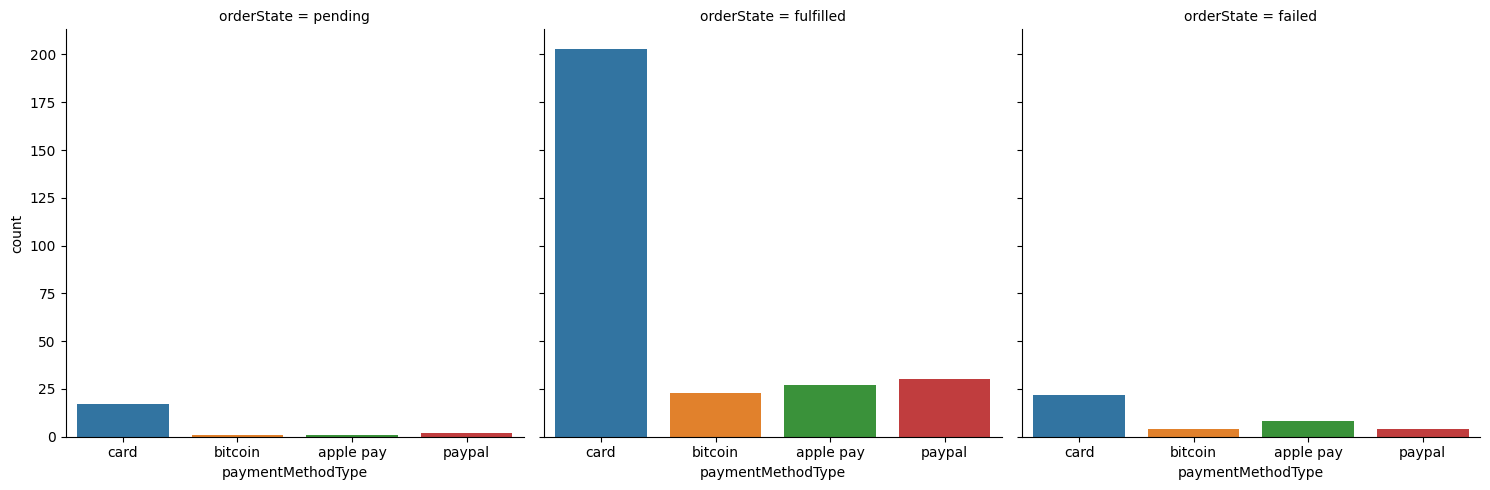

In [24]:
grafico = sns.catplot(x="paymentMethodType",
                      col="orderState",
                      data = data,
                      kind = "count") 

Podemos observar que el método de pago más común es la tarjeta.  

También podemos ver que tanto si el estado de la orden se cumplió o está pendiente, la distribución de los demás métodos de pago es similar, es decir, el 2 método de pago más común es _paypal_, el 3ero _apple pay_ y el 4to _bitcoin_.  
Sin embargo, si el estado de la orden falló, el 2 método de pago más común es _apple pay_.

Por lo tanto, voy a hacer una inspección más profunda acerca de la categoría `paymentMethodType`, al ver como se comporta su distribución en base a si fue fraude o no.

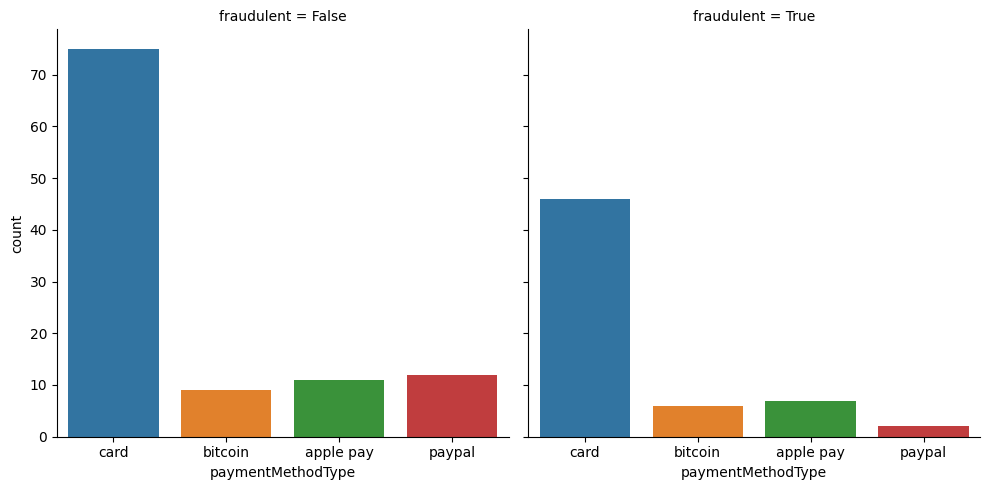

In [25]:
grafico2 = sns.catplot(x="paymentMethodType",
                      col="fraudulent",
                      data = data,
                      kind = "count") 

Como se concluyó anteriormente, la distribución de los métodos de pago varía tanto si es fraude o como si no.  

Como podemos ver, cuando _fraudulent == True_ el 2 método de pago más utilizado es __apple pay__, que es lo que encontramos anteriormente, entonces podemos decir que cuando cambia la distribución de esa manera es probable que sea fraude.

### 2.3 - Análisis de numérica vs numérica 

In [26]:
data_aux = data[["orderAmount", "transactionAmount"]].copy()

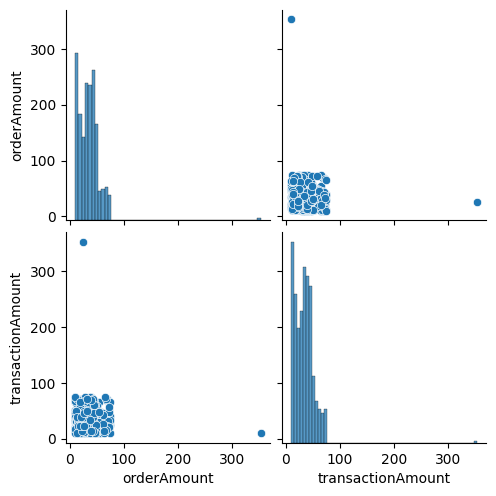

In [27]:
sns.pairplot(data_aux)

La conclusión que podemos sacar de este gráfico, es que ambas variables poseen una distribución similar y que a su vez comparten la presencia de un outlier con un valor similar.

# Correlación

## 1- Gráficos

Como tenemos pocas columnas, no es necesario tomar una muestra.

Para ver correlaciones entre todas las variables hacemos One Hot Encoding.

In [28]:
data_ohe = pd.get_dummies(data)

In [29]:
data_corr = data_ohe.corr()
data_corr

,transactionAmount,transactionFailed,orderAmount,fraudulent_False,fraudulent_True,paymentMethodRegistrationFailure_False,paymentMethodRegistrationFailure_True,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,...,emailProvider_gmail,emailProvider_hotmail,emailProvider_other,emailProvider_weird,emailProvider_yahoo,customerIPAddressSimplified_digits_and_letters,customerIPAddressSimplified_only_numeric_digits,sameCity_no,sameCity_unknown,sameCity_yes
transactionAmount,1.000000,0.002385,-0.077408,-0.027417,-0.059075,-0.049227,0.068578,0.056958,0.006945,-0.068296,...,-0.050276,-0.042166,-0.008327,0.054498,-0.010997,-0.068108,0.068108,-0.057725,0.060875,-0.025381
transactionFailed,0.002385,1.000000,-0.016296,0.049350,0.006700,0.047489,-0.055873,0.035530,-0.027069,-0.009339,...,-0.005981,0.072848,0.044709,-0.047432,-0.031251,0.013583,-0.013583,0.009223,-0.004490,-0.034484
orderAmount,-0.077408,-0.016296,1.000000,0.037817,-0.025204,0.015586,0.081234,0.018371,-0.021398,0.068665,...,-0.040742,0.001376,0.070814,-0.017815,-0.035060,0.025579,-0.025579,0.020282,-0.021213,0.007167
fraudulent_False,-0.027417,0.049350,0.037817,1.000000,-0.150025,0.341745,0.141156,0.087858,0.086090,0.291960,...,0.208943,0.294533,0.469317,-0.761818,0.364012,0.501400,-0.501400,0.631623,-0.635068,0.049391
fraudulent_True,-0.059075,0.006700,-0.025204,-0.150025,1.000000,0.285627,0.023873,0.080437,0.084943,0.247165,...,0.297177,0.107353,0.354402,-0.502109,0.081025,0.286533,-0.286533,0.503159,-0.510989,0.076779
paymentMethodRegistrationFailure_False,-0.049227,0.047489,0.015586,0.341745,0.285627,1.000000,-0.254066,0.200260,0.115135,0.650333,...,0.176841,0.167788,0.303061,-0.470402,0.166819,0.289580,-0.289580,0.431065,-0.429072,0.001732
paymentMethodRegistrationFailure_True,0.068578,-0.055873,0.081234,0.141156,0.023873,-0.254066,1.000000,0.047389,0.164429,0.140566,...,0.060520,0.018172,0.093447,-0.140818,0.066458,0.100602,-0.100602,0.098086,-0.111288,0.100896
paymentMethodType_apple pay,0.056958,0.035530,0.018371,0.087858,0.080437,0.200260,0.047389,1.000000,-0.053722,-0.197368,...,0.069873,0.024477,0.088349,-0.133136,0.043241,0.053310,-0.053310,0.101039,-0.098607,-0.014054
paymentMethodType_bitcoin,0.006945,-0.027069,-0.021398,0.086090,0.084943,0.115135,0.164429,-0.053722,1.000000,-0.172888,...,0.057247,0.121878,0.031319,-0.134215,0.062394,0.083316,-0.083316,0.090586,-0.088444,-0.012311
paymentMethodType_card,-0.068296,-0.009339,0.068665,0.291960,0.247165,0.650333,0.140566,-0.197368,-0.172888,1.000000,...,0.165966,0.105942,0.269636,-0.398546,0.136551,0.251058,-0.251058,0.379941,-0.387651,0.071207


In [30]:
from funpymodeling.exploratory import corr_pair

In [31]:
cor_d = corr_pair(data_ohe)
cor_d

,v1,v2,R,R2
1,transactionFailed,transactionAmount,0.002385,0.000006
2,orderAmount,transactionAmount,-0.077408,0.005992
3,fraudulent_False,transactionAmount,-0.027417,0.000752
4,fraudulent_True,transactionAmount,-0.059075,0.003490
5,paymentMethodRegistrationFailure_False,transactionAmount,-0.049227,0.002423
...,...,...,...,...
3594,emailProvider_yahoo,sameCity_yes,0.122151,0.014921
3595,customerIPAddressSimplified_digits_and_letters,sameCity_yes,0.064904,0.004213
3596,customerIPAddressSimplified_only_numeric_digits,sameCity_yes,-0.064904,0.004213
3597,sameCity_no,sameCity_yes,-0.030131,0.000908


In [32]:
cor_d.sort_values(by = ["R2"],ascending=False).query("R2 > 0.7 ")

,v1,v2,R,R2
2993,emailProvider_weird,emailDomain_weird,1.000000,1.000000
3229,emailDomain_weird,emailProvider_weird,1.000000,1.000000
3356,customerIPAddressSimplified_only_numeric_digits,customerIPAddressSimplified_digits_and_letters,-1.000000,1.000000
3415,customerIPAddressSimplified_digits_and_letters,customerIPAddressSimplified_only_numeric_digits,-1.000000,1.000000
3478,sameCity_unknown,sameCity_no,-0.990735,0.981555
3537,sameCity_no,sameCity_unknown,-0.990735,0.981555
2753,emailProvider_weird,emailDomain_com,-0.863252,0.745204
2749,emailDomain_weird,emailDomain_com,-0.863252,0.745204
2985,emailDomain_com,emailDomain_weird,-0.863252,0.745204
3225,emailDomain_com,emailProvider_weird,-0.863252,0.745204


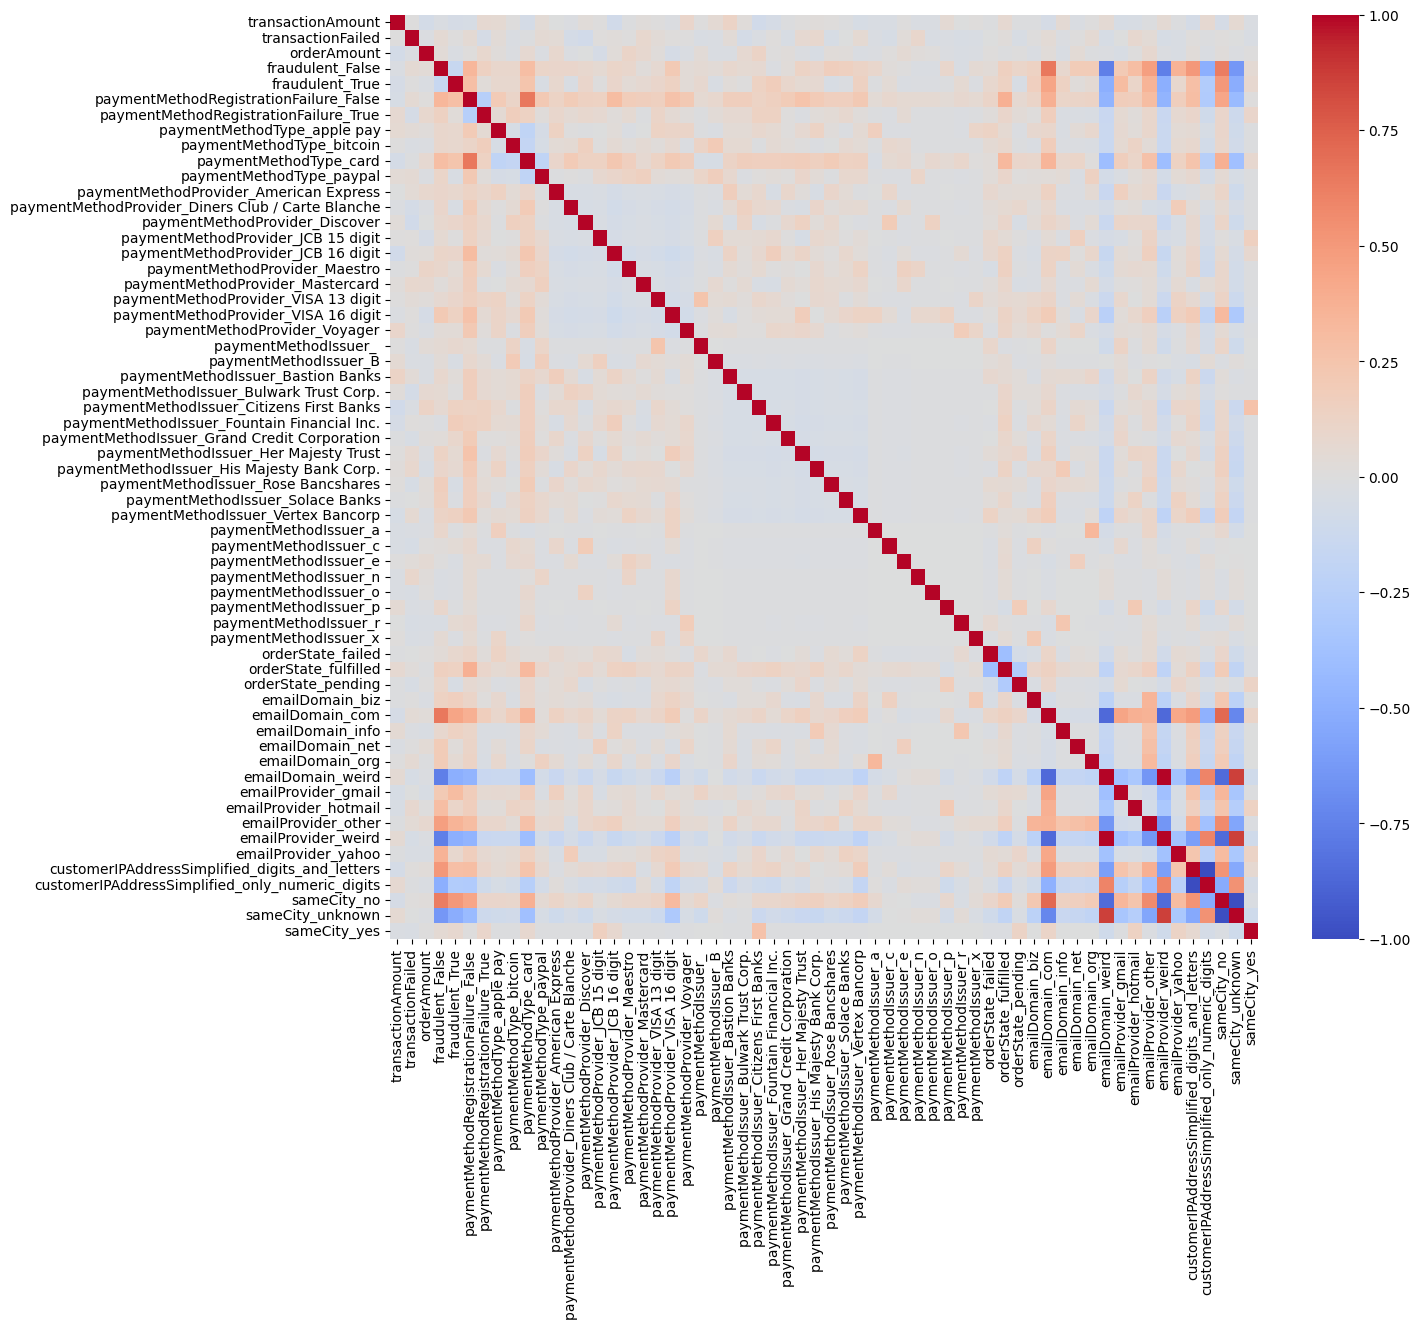

In [33]:
plt.figure(figsize=[14,12])
plt.rcParams.update({"font.size":10})
sns.heatmap(data_ohe.corr(),cmap="coolwarm")
plt.show()

__Algunos insights que pude encontrar son:__

- Una alta correlación positiva de `emailProvider_weird` y `emailDomain_weird` con `sameCity_unknown`.
- Una alta correlación negativa de `emailProvider_weird` y `emailDomain_weird` con `sameCity_no`.

Ambas correlaciones nos pueden dar una idea de que cuando el proveedor del email es raro o el dominio del email es raro, es muy probable que se desconozca si la ciudad es la misma.  
Esto nos podría indicar la presencia de un __fraude__. 

- Una alta correlación positiva entre `emailProvider_weird` y `emailDomain_weird`.

Claramente indica que cuando el proveedor del email es raro, el dominio del email es raro.

- Una correlación positiva entre `paymentMethodType_card` y `paymentMethodRegistrationFailure_False`.

Podemos deducir que cuando se suele utilizar la tarjeta como método de pago, el registro del método de pago no suele fallar.

- Una correlación negativa de `emailProvider_weird`, `emailDomain_weird` y `sameCity_unknown` con `fraudulent_False`.

Nos indica que cuando suele ser fraude, el proveedor y el dominio del email tiende a ser raro, y se suele desconocer si la ciudad es la misma. Justamente, anteriormente mencionamos la alta correlación positiva entre estas 3 categorías.

## 2- Análisis de correlaciones no lineales basadas en teoría de la información

In [34]:
from __future__ import division
import numpy as np
from minepy import MINE

In [35]:
#Especificación
mine = MINE(alpha=0.6, c=15, est="mic_approx")

#Cálculo de los estadísticos
mine.compute_score(data['transactionAmount'], data['transactionFailed'])

#Resultados
mine.mic()

0.061135409260562004

In [36]:
import itertools
col_pairs=list(itertools.combinations(data_ohe.columns, 2))

In [37]:
df_res = pd.DataFrame()

In [38]:
for a,b in col_pairs:
    mine = MINE(alpha=0.6, c=15, est="mic_approx")
    mine.compute_score(data_ohe[a], data_ohe[b])
    df_res = pd.concat([df_res, pd.DataFrame([{"v1":a, "v2":b, "mic":mine.mic()}])], ignore_index=True)

In [39]:
df_res

,v1,v2,mic
0,transactionAmount,transactionFailed,0.061135
1,transactionAmount,orderAmount,0.157203
2,transactionAmount,fraudulent_False,0.076939
3,transactionAmount,fraudulent_True,0.086309
4,transactionAmount,paymentMethodRegistrationFailure_False,0.087016
...,...,...,...
1765,customerIPAddressSimplified_only_numeric_digits,sameCity_unknown,0.171092
1766,customerIPAddressSimplified_only_numeric_digits,sameCity_yes,0.001947
1767,sameCity_no,sameCity_unknown,0.735750
1768,sameCity_no,sameCity_yes,0.001152


In [40]:
df_res.sort_values(by = ["mic"], ascending = False)

,v1,v2,mic
1718,emailDomain_weird,emailProvider_weird,8.315999e-01
1767,sameCity_no,sameCity_unknown,7.357502e-01
1668,emailDomain_com,emailDomain_weird,5.513216e-01
1672,emailDomain_com,emailProvider_weird,5.513216e-01
1760,customerIPAddressSimplified_digits_and_letters,customerIPAddressSimplified_only_numeric_digits,5.396085e-01
...,...,...,...
396,paymentMethodType_apple pay,paymentMethodProvider_Diners Club / Carte Blanche,8.206695e-07
101,transactionFailed,emailDomain_biz,6.167443e-07
959,paymentMethodProvider_VISA 16 digit,paymentMethodIssuer_His Majesty Bank Corp.,1.656669e-07
1265,paymentMethodIssuer_Grand Credit Corporation,emailProvider_hotmail,1.298039e-08


In [41]:
df_res.sort_values(by = ["mic"], ascending = False).query("mic > 0.5")

,v1,v2,mic
1718,emailDomain_weird,emailProvider_weird,0.831600
1767,sameCity_no,sameCity_unknown,0.735750
1668,emailDomain_com,emailDomain_weird,0.551322
1672,emailDomain_com,emailProvider_weird,0.551322
1760,customerIPAddressSimplified_digits_and_letters,customerIPAddressSimplified_only_numeric_digits,0.539608
1723,emailDomain_weird,sameCity_unknown,0.535473
1753,emailProvider_weird,sameCity_unknown,0.535473
156,orderAmount,orderState_fulfilled,0.528151
1752,emailProvider_weird,sameCity_no,0.522719
1722,emailDomain_weird,sameCity_no,0.522719


Observando el valor mic entre varias categorías, podemos reafirmar lo que concluimos anteriormente para el gráfico de correlación.